In [4]:
cd D:\Data TA

D:\Data TA


In [5]:
ls

 Volume in drive D has no label.
 Volume Serial Number is 64D0-DF28

 Directory of D:\Data TA

07/20/2021  08:23 PM    <DIR>          .
07/20/2021  08:23 PM    <DIR>          ..
07/19/2021  01:45 PM       537,642,512 best_model_AlexNet.h5
07/19/2021  01:24 PM       537,642,512 best_weight_AlexNet.h5
05/27/2021  08:06 PM    <DIR>          Clahe
05/27/2021  08:06 PM    <DIR>          ClaheGaussian
06/23/2021  06:16 PM         1,048,710 covid1.tif
06/23/2021  06:18 PM         1,048,710 covid2.tif
06/23/2021  06:19 PM         1,048,710 covid3.tif
06/23/2021  06:21 PM         1,048,710 covid4.tif
07/19/2021  01:43 PM         1,048,710 covid5.tif
07/20/2021  09:12 PM             2,489 demo.py
05/27/2021  08:06 PM    <DIR>          Gaussian
06/23/2021  06:12 PM             9,643 images.jpg
06/23/2021  06:17 PM         1,048,710 normal1.tif
06/23/2021  06:20 PM         1,048,710 normal2.tif
06/23/2021  06:20 PM         1,048,710 normal3.tif
05/28/2021  07:31 PM    <DIR>          Normalized
06/

In [6]:
# import the necessary packages
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adamax
from keras.regularizers import l2
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

In [ ]:
#Normalized dataset
import PIL.Image as pil_image
import io
path ='D:\\Data TA\\Selected Covidset\\Covid\\'
path_no = 1
for paths in os.listdir(path) :
  if paths.endswith(".tif"):
    filepath = os.path.join(path, paths)
    img = Image.open(filepath)
    array=np.array(img)
    max_val=np.amax(array)
    normalized=(array/max_val)
    im = pil_image.fromarray(normalized)
    if path_no < 10 :
      save_path='D:\\Data TA\\Normalized\\Covid\\' + str('IM0000') +str(path_no) + '.tif'
    elif path_no <100 :
      save_path='D:\\Data TA\\Normalized\\Covid\\' + str('IM000') +str(path_no) + '.tif'
    else :
      save_path='D:\\Data TA\\Normalized\\Covid\\' + str('IM00') +str(path_no) + '.tif'
    im.save(save_path,'TIFF') 
    path_no +=1

print("Normalized Success")

In [ ]:
#Gaussian Filter
import cv2
from skimage import io
from skimage.filters import gaussian
path ='D:\\Data TA\\Normalized\\Covid\\'
path_no = 1
for paths in os.listdir(path) :
  if paths.endswith(".tif"):
    filepath = os.path.join(path, paths)
    img = Image.open(filepath)
    img = np.array(img)
    gausfilter = gaussian(img, sigma=1, mode='constant', cval=0.0)
    im = Image.fromarray(gausfilter)
    if path_no < 10 :
      save_path='D:\\Data TA\\Gaussian\\Covid\\' + str('IM0000') +str(path_no) + '.tif'
    elif path_no <100 :
      save_path='D:\\Data TA\\Gaussian\\Covid\\' + str('IM000') +str(path_no) + '.tif'
    else :
      save_path='D:\\Data TA\\Gaussian\\Covid\\' + str('IM00') +str(path_no) + '.tif'
    im.save(save_path,'TIFF') 
    path_no +=1

print("Denoissing Success")

In [ ]:
#CLAHE
from skimage import exposure
path ='D:\\Data TA\\Gaussian\\Normal\\'
path_no = 1
for paths in os.listdir(path) :
  if paths.endswith(".tif"):
    filepath = os.path.join(path, paths)
    img = Image.open(filepath)
    img = np.array(img)
    clahe = exposure.equalize_adapthist(img)
    im = Image.fromarray(clahe)
    if path_no < 10 :
      save_path='D:\\Data TA\\ClaheGaussian\\Normal\\' + str('IM0000') +str(path_no) + '.tif'
    elif path_no <100 :
      save_path='D:\\Data TA\\ClaheGaussian\\Normal\\' + str('IM000') +str(path_no) + '.tif'
    else :
      save_path='D:\\Data TA\\ClaheGaussian\\Normal\\' + str('IM00') +str(path_no) + '.tif'
    im.save(save_path,'TIFF') 
    path_no +=1

print("CLAHE Success")

In [7]:
im = cv2.imread('D:\\Data TA\\Normalized\\Covid\\IM00001.tif', -1)
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

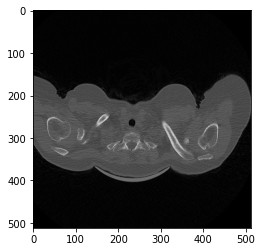

In [8]:
plt.imshow(im_rgb)

In [9]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("Clahe") 
data = []
labels = []

[INFO] loading images...


In [10]:
width = 224
height = 224
dsize = (width, height)
# loop over our input images
for imagePath in imagePaths:
  # load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
    image = cv2.imread(imagePath,-1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  #image = image.convert('L')
    image = cv2.resize(image,dsize)
    image = np.array(image)
    data.append(image)

  # extract the class label from the file path and update the
	# labels list
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

Covid


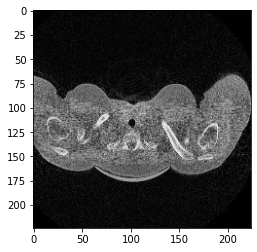

In [11]:
print(labels[0])
plt.imshow(data[0])

In [12]:
print(labels)

['Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(labels)
labels = encoder.transform(labels)

In [14]:
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [15]:
data = np.array(data)
data.shape

(1000, 224, 224, 3)

In [16]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(750, 224, 224, 3)
(250, 224, 224, 3)
(750,)
(250,)


In [17]:
print(trainX[0])

[[[0.00663839 0.00663839 0.00663839]
  [0.00663839 0.00663839 0.00663839]
  [0.00663839 0.00663839 0.00663839]
  ...
  [0.00663839 0.00663839 0.00663839]
  [0.00663839 0.00663839 0.00663839]
  [0.00663839 0.00663839 0.00663839]]

 [[0.00663839 0.00663839 0.00663839]
  [0.00663839 0.00663839 0.00663839]
  [0.00663839 0.00663839 0.00663839]
  ...
  [0.00663839 0.00663839 0.00663839]
  [0.00663839 0.00663839 0.00663839]
  [0.00663839 0.00663839 0.00663839]]

 [[0.00663839 0.00663839 0.00663839]
  [0.00663839 0.00663839 0.00663839]
  [0.00663839 0.00663839 0.00663839]
  ...
  [0.00663839 0.00663839 0.00663839]
  [0.00663839 0.00663839 0.00663839]
  [0.00663839 0.00663839 0.00663839]]

 ...

 [[0.00663839 0.00663839 0.00663839]
  [0.00663839 0.00663839 0.00663839]
  [0.00663839 0.00663839 0.00663839]
  ...
  [0.00663839 0.00663839 0.00663839]
  [0.00663839 0.00663839 0.00663839]
  [0.00663839 0.00663839 0.00663839]]

 [[0.00663839 0.00663839 0.00663839]
  [0.00663839 0.00663839 0.00663839]


0


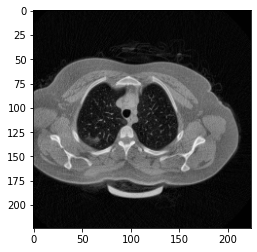

In [18]:
plt.imshow(trainX[0])
print(trainY[0])

In [19]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout

In [30]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(2, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
batch_normalization_5 (Batch (None, 54, 54, 96)        384       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 256)       614656    
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 256)       1024      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 384)      

In [31]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss',
                   patience=5,
                   mode='auto',
                   restore_best_weights=True)
checkpoint = ModelCheckpoint('best_weight_AlexNet2.h5',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='auto',)

In [ ]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=0.1, decay=1e-6)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=32, callbacks=[es,checkpoint])

[INFO] training network...
Epoch 1/50
24/24 [==============================] - ETA: 0s - loss: 399050.9688 - accuracy: 0.5867
Epoch 00001: val_accuracy improved from -inf to 0.48000, saving model to best_weight_AlexNet2.h5
24/24 [==============================] - 59s 2s/step - loss: 399050.9688 - accuracy: 0.5867 - val_loss: 49165004.0000 - val_accuracy: 0.4800
Epoch 2/50
24/24 [==============================] - ETA: 0s - loss: 994.2309 - accuracy: 0.6493 
Epoch 00002: val_accuracy did not improve from 0.48000
24/24 [==============================] - 51s 2s/step - loss: 994.2309 - accuracy: 0.6493 - val_loss: 7626379.0000 - val_accuracy: 0.4800
Epoch 3/50
24/24 [==============================] - ETA: 0s - loss: 167.4103 - accuracy: 0.6973
Epoch 00003: val_accuracy did not improve from 0.48000
24/24 [==============================] - 49s 2s/step - loss: 167.4103 - accuracy: 0.6973 - val_loss: 2521478.2500 - val_accuracy: 0.4800
Epoch 4/50
24/24 [==============================] - ETA: 0s

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


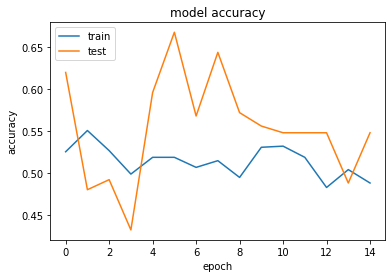

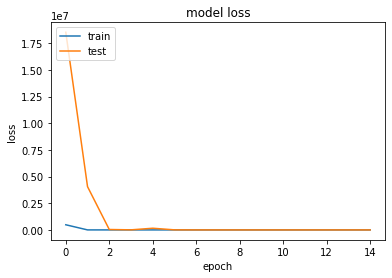

In [23]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
predictions = model.predict(testX, batch_size=32)

In [25]:
print(predictions.argmax(axis=1))

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0]


In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [27]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY,predictions.argmax(axis=1),target_names = encoder.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       Covid       0.54      1.00      0.70       130
      Normal       1.00      0.07      0.14       120

    accuracy                           0.56       250
   macro avg       0.77      0.54      0.42       250
weighted avg       0.76      0.56      0.43       250



In [28]:
cf_matrix = confusion_matrix(testY,predictions.argmax(axis=1))
print(cf_matrix)

[[130   0]
 [111   9]]


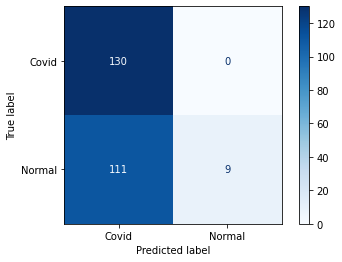

In [29]:
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=encoder.classes_)
disp.plot(cmap=plt.cm.Blues)

In [37]:
import io

path='D:\\COVID-CTset\\covid1\\patient40\\SR_2\\IM00001.tif'
save_path='D:\\Data TA\\covid5.tif'
with open(path, 'rb') as f:
    tif = Image.open(io.BytesIO(f.read()))
array=np.array(tif)
max_val=np.amax(array)
normalized=(array/max_val)
im = Image.fromarray(normalized)
im.save(save_path,'TIFF')

In [5]:
width = 224
height = 224
dsize = (width, height)
image_testing = cv2.imread('D:\\Data TA\\covid5.tif', -1)
image_testing = cv2.cvtColor(image_testing, cv2.COLOR_BGR2RGB)
image_testing = cv2.resize(image_testing,dsize)
image_testing = np.array(image_testing)
image_testing.shape

(224, 224, 3)

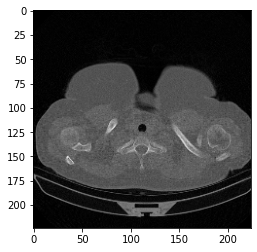

In [6]:
plt.imshow(image_testing)

In [8]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 224, 224, 3)


In [9]:
output = model.predict(image_testing, 1)
print(output)
final_output= output.argmax(axis=1)
if final_output == 0 :
    print('Covid')
else:
    print('Normal')

[[1.00000e+00 5.15263e-15]]
Covid


In [66]:
model.save('D:\\Data TA\\best_model_AlexNet.h5')

In [4]:
model = tf.keras.models.load_model("best_weight_AlexNet.h5")
